Load Data and Plot Uncorrected Imaging Volume

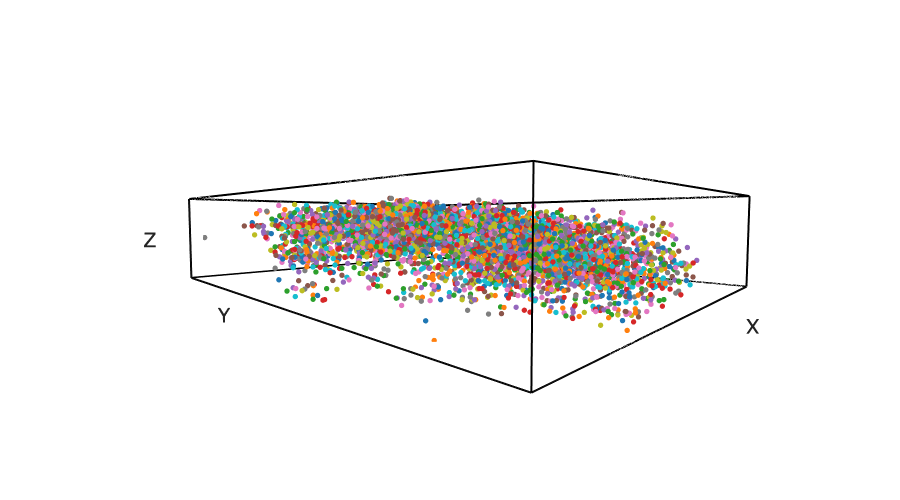

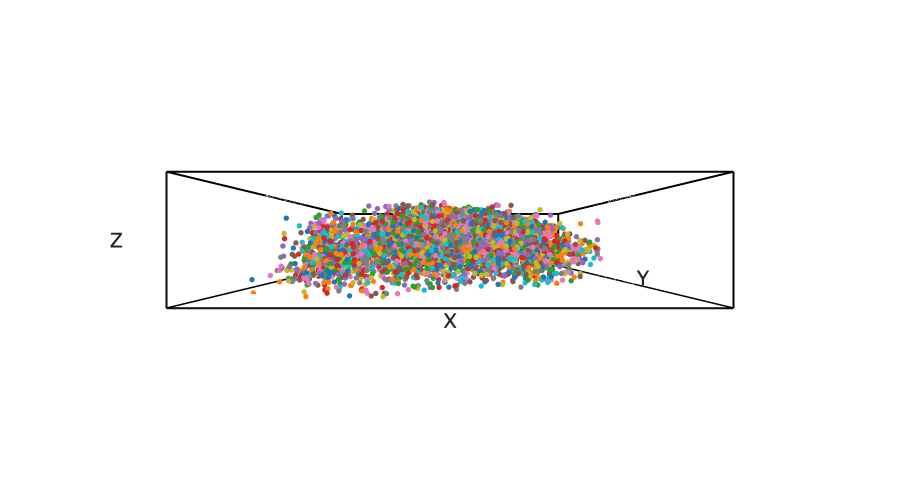

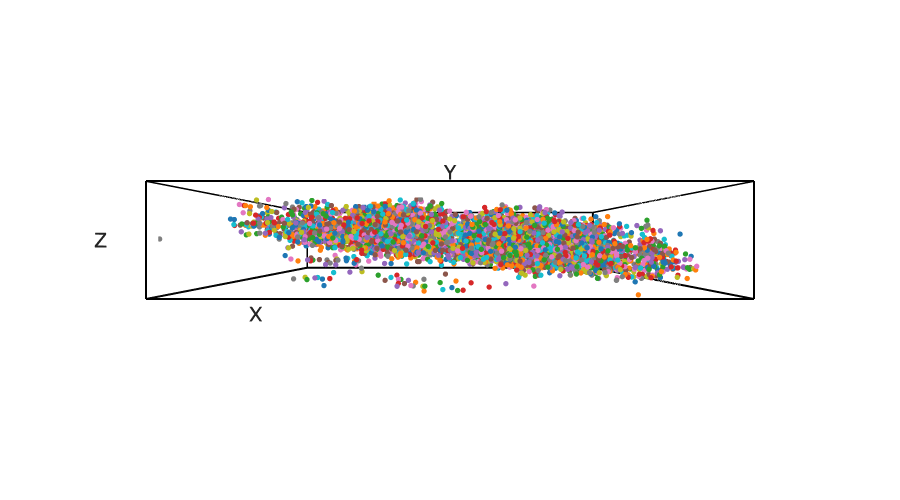

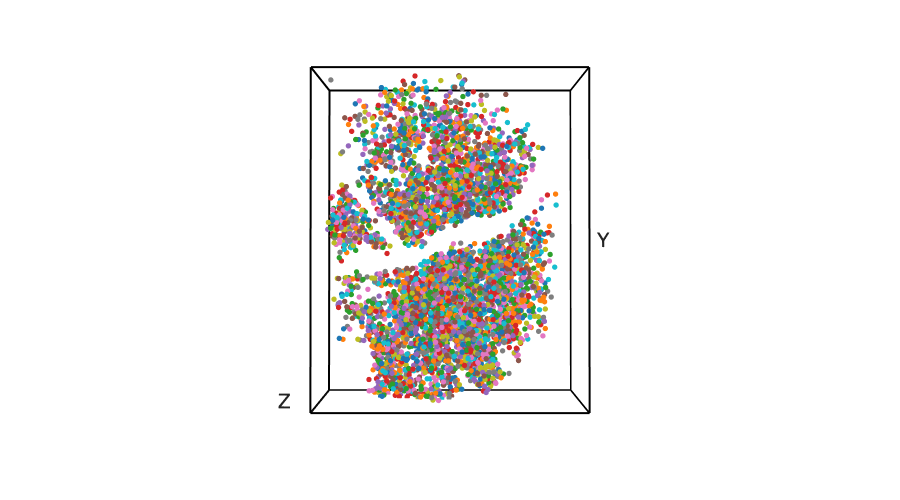

In [14]:
import glob
import numpy as np
from skimage.measure import label, regionprops
import plotly.express as px
import plotly.io as pio
import pandas as pd

file_path = "/Users/ryan.gorzek/Documents/Trachtenberg Lab/Data/rAAV/"
exp_names = [
    "retr02",
#     "retr00",
#     "retr04",
#     "retr07",
#     "retr08",
#     "retr09",
#     "retr10"
            ]

for exp in exp_names:
    curr_path = file_path + exp + "/"
    file_name = glob.glob(curr_path + "*.npy")
    in_data = np.load(file_name[0], allow_pickle=True)
    data = in_data.item()

    def draw_bbox(xlims, ylims, zlims):
        X = []
        Y = []
        Z = []
        for x in xlims:
            for y in ylims:
                for z in zlims:
                    X.append(x)
                    Y.append(y)
                    Z.append(z)
        for x in xlims:
            for z in zlims:
                for y in ylims:
                    X.append(x)
                    Y.append(y)
                    Z.append(z)
        for z in zlims:
            for y in ylims:
                for x in xlims:
                    X.append(x)
                    Y.append(y)
                    Z.append(z)
        return X, Y, Z

    masks = data["masks"]
    regions = regionprops(masks)

    X, Y, Z = draw_bbox([795,0], [0,899], [0,masks.shape[0]-1])
    df = pd.DataFrame(dict(
        X=X, 
        Y=Y, 
        Z=Z,
        line_group=np.repeat(range(int(len(X)/2)), 2)
                     ))
    fig = px.line_3d(df, x='X', y='Y', z='Z', line_group='line_group', template="simple_white")
    fig.update_traces(line_color="black", line_width=4)
    for region in regions:
        z, y, x = region.centroid
        fig.add_scatter3d(x=[x], y=[y], z=[z])
    camera = dict(eye=dict(x=12, y=12, z=0.85))
    fig.update_layout(
        scene = dict(
            xaxis = dict(ticks="", range=[795, 0], showgrid=False, showticklabels=False, title_font_size=20),
            yaxis = dict(ticks="", range=[0, 899], showgrid=False, showticklabels=False, title_font_size=20),
            zaxis = dict(ticks="", range=[0, masks.shape[0]-1], showgrid=False, showticklabels=False, title_font_size=20),
            aspectmode="manual",
            aspectratio=dict(x=13.7, y=17, z=(masks.shape[0]*5)/100),),
        width=900,
        showlegend=False,
        scene_camera=camera
                    )
    fig.update_traces(marker_size=3)
    fig.show("png")
    pio.write_image(fig, curr_path + "XYZ_view.png", scale=3)

    fig.update_layout(scene_camera=dict(eye=dict(x=0, y=19, z=0)))
    fig.show("png")
    pio.write_image(fig, curr_path + "XZ_view.png", scale=3)

    fig.update_layout(scene_camera=dict(eye=dict(x=19, y=0, z=0)))
    fig.show("png")
    pio.write_image(fig, curr_path + "YZ_view.png", scale=3)

    fig.update_layout(scene_camera=dict(eye=dict(x=0, y=0.1, z=23)))
    fig.show("png")
    pio.write_image(fig, curr_path + "XY_view.png", scale=3)